# MNIST - Handwritten digit classification

Using the code from the first tensorflow tutorial (below). We can investigate how a simple 2 layer neural network represents the patterns it has learnt to classify the images.

In [3]:
import tensorflow as tf
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)



x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)

y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
  
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
acc_val, b_val, W_val, Y = sess.run([accuracy, b ,W, y], feed_dict={x: mnist.test.images, y_: mnist.test.labels})
print('Accuracy = '+str(acc_val) + '%')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Accuracy = 0.9127%


So the network above has an input layer of 784 nodes (each corresponding to pixels), and 10 output nodes (each corresponding to a digit).

Each input node as a weight to each output node (weight matrix = 784x10). The weights represent how each pixel votes for different digits.

Populating the interactive namespace from numpy and matplotlib


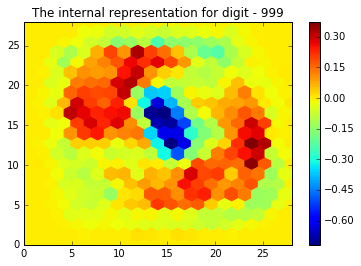

In [6]:
%pylab inline

(n,m) = W_val.shape
N = int(pylab.sqrt(n))
W_val = pylab.transpose(W_val)

#for a digit
def plotter(W,N):
    #create a mesh
    x = y = pylab.linspace(0, N, N)
    X, Y = pylab.meshgrid(x, y)
    #and flatten it
    x = X.ravel()
    y = Y.ravel()
    z = W.ravel()
    gridsize=N-8
    pylab.figure(i)
    pylab.title('The internal representation for digit - ' +str(i))
    pylab.hexbin(x, y, C=z, gridsize=gridsize, cmap=pylab.jet(), bins=None)
    pylab.axis([x.min(), x.max(), y.min(), y.max()])
    
    cb = pylab.colorbar()
    pylab.show()   
    
plotter(W_val[0],N)

So these plots gives us a good look into how the network has learnt to identify a handwritten 0. Red signifies strong positive weights while blue signifies strong negative weights. This pitcure makes sense as representing a zero as something that

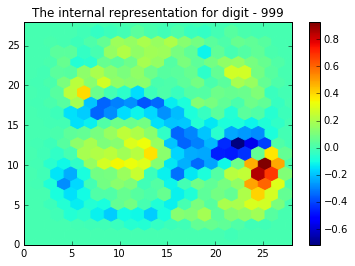

In [7]:
plotter(W_val[5],N)

However, not all of the representations are particularly intuitive.

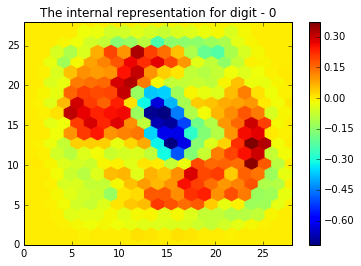

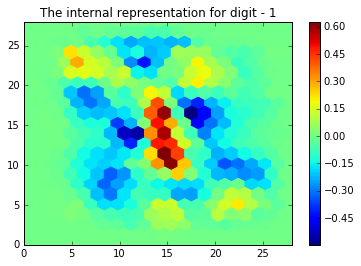

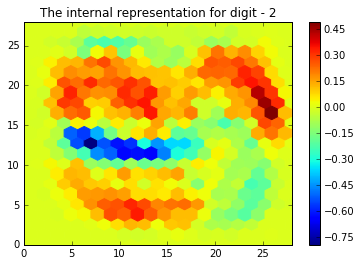

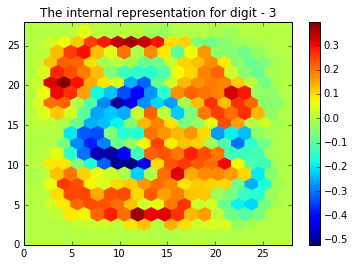

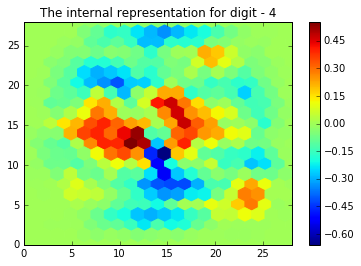

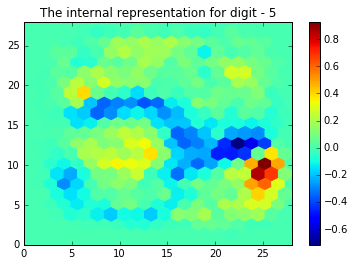

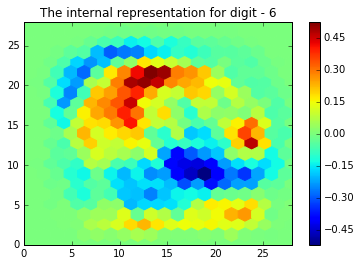

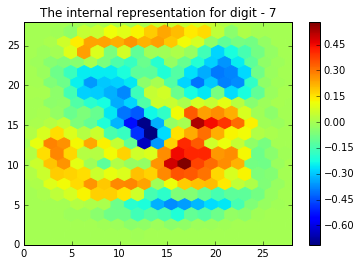

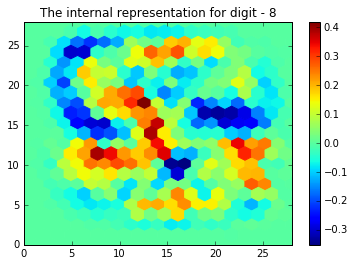

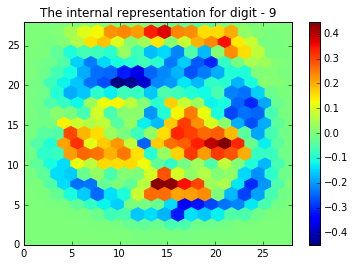

In [8]:
for i in range(0,10):
    plotter(W_val[i],N)

A 90% error rate is very poor. That is equivalent to systematically getting one of the digits wrong. Maybe it is getting one consistently wrong?

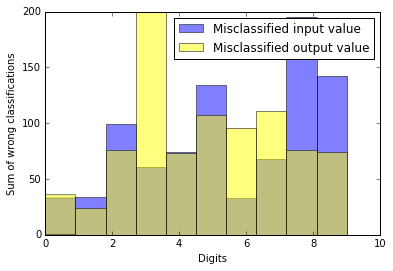

In [9]:
#Figure out which digits were classified incorrectly
classified = pylab.argmax(Y, axis = 1)
digits = pylab.argmax(mnist.test.labels, axis = 1)
same = pylab.equal(classified, digits)
x1 = []
x2 = []
for i in range(len(same)):
    if same[i] == False: #if it was not classified correctly
        x1.append(digits[i])
        x2.append(classified[i])
        
#Plot the data
n, bins, patches = pylab.hist(x1, facecolor='blue', alpha = 0.5, label=['Misclassified input value'])
n, bins, patches = pylab.hist(x2, facecolor='yellow', alpha = 0.5, label = ['Misclassified output value'])
pylab.xlabel('Digits')
pylab.ylabel('Sum of wrong classifications')
pylab.legend()
ylimit = pylab.ylim([0, 200])

I wonder how different representations of each digit are???

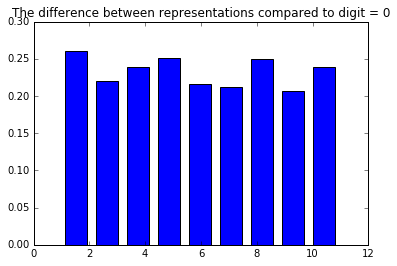

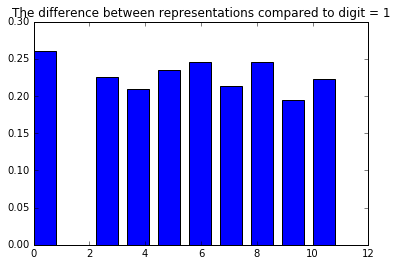

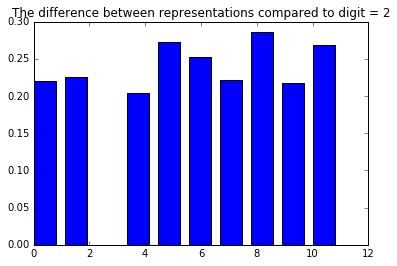

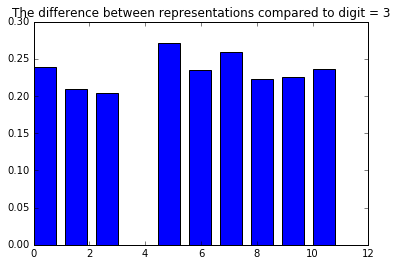

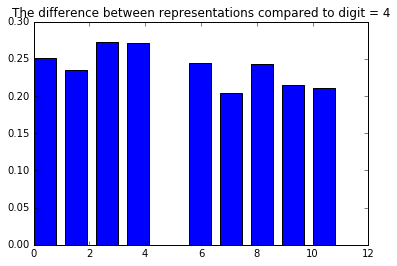

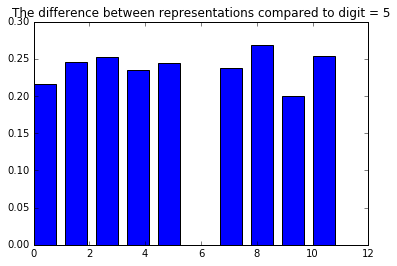

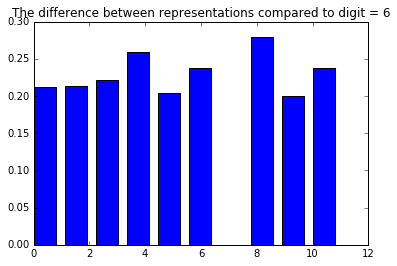

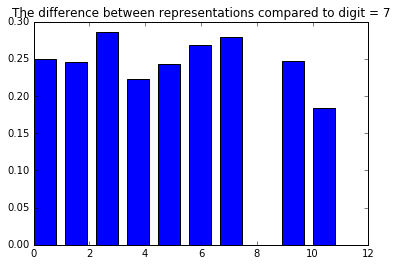

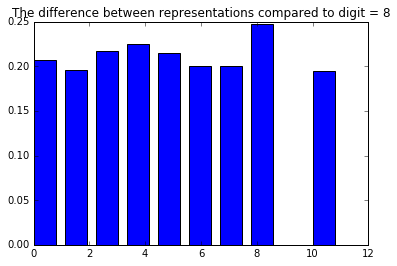

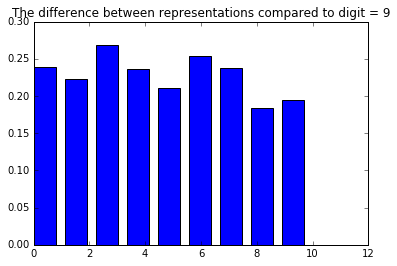

In [10]:
var = pylab.zeros((10,10))
for i in range(10):
    for j in range(10):
        if i != j:
            #var[i][j] = pylab.linalg.norm(W_val[i] - W_val[j], ord = inf)
            var[i][j] = pylab.sqrt(pylab.mean((W_val[i]-W_val[j])**2)) #rms
            
x = pylab.linspace(0, 10, 10)
for i in range(10):
    fig = pylab.figure()
    pylab.bar(x,var[i])
    pylab.title('The difference between representations compared to digit = ' + str(i))

# Questions
Why is this 2 layer network so effective considering it has ignored all 2D relationships (by flattening the input).


Problems with the network:
* The network is very sensitive to the position of the digits. If it were given a digit that was rotated, scaled, or displaced it would be unlikely to classify it properly. If it were trained with this sort of data it would not be able to find good representations as the back propagated errors would interfere with each other.
* 
* 


# Perturb the training data

What if we rotate some of the inputs? By 90, 180 or 270 degrees and train them. Will the network be able to learn them? I doubt it as ...?